In [14]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#Allow notebook to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

pd.__version__


'1.5.1'

In [15]:
#   read in the csv file and eliminate some unwanted data

csv_path = "Final database.csv"
spotify_data = pd.read_csv(csv_path, na_values=['n', 'n ', 'n-a','#', 'NaN', 'n'])
spotify_data.head(100)

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863JCkyWqtk,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1.0,1.0,0.767,0.709,1.0,-4.470,1.0,0.3360,0.32300,0.0,0.0676,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863JCkyWqtk,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1.0,1.0,0.767,0.709,1.0,-4.470,1.0,0.3360,0.32300,0.0,0.0676,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863JCkyWqtk,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1.0,1.0,0.767,0.709,1.0,-4.470,1.0,0.3360,0.32300,0.0,0.0676,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863JCkyWqtk,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1.0,1.0,0.767,0.709,1.0,-4.470,1.0,0.3360,0.32300,0.0,0.0676,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nor

In [16]:
#create dataframe for country, genre and popularity
spotify_clean=spotify_data[["Country", "Uri", "Popularity", "Artist", "Album/Single", "Genre", "Artist_followers", "Explicit", "Album", "Release_date", "Track_number", "Tracks_in_album", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acoustics", "instrumentalness", "liveliness", "valence", "tempo", "duration_ms", "time_signature", "Genre_new", "Days_since_release"]]
spotify_clean.dropna()
spotify_clean.info(verbose= True,memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             170633 non-null  object 
 1   Uri                 170628 non-null  object 
 2   Popularity          170633 non-null  float64
 3   Artist              170628 non-null  object 
 4   Album/Single        170628 non-null  object 
 5   Genre               166681 non-null  object 
 6   Artist_followers    170587 non-null  float64
 7   Explicit            170628 non-null  object 
 8   Album               170628 non-null  object 
 9   Release_date        170628 non-null  object 
 10  Track_number        170628 non-null  float64
 11  Tracks_in_album     170628 non-null  float64
 12  danceability        170614 non-null  float64
 13  energy              170614 non-null  float64
 14  key                 170614 non-null  float64
 15  loudness            170614 non-nul

In [17]:
#Remove additional rows with blank (null) values
for x in spotify_clean.columns:
    spotify_clean = spotify_clean[spotify_clean[x].notna()]
spotify_clean.info(verbose=True, memory_usage=True,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163529 entries, 0 to 170632
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             163529 non-null  object 
 1   Uri                 163529 non-null  object 
 2   Popularity          163529 non-null  float64
 3   Artist              163529 non-null  object 
 4   Album/Single        163529 non-null  object 
 5   Genre               163529 non-null  object 
 6   Artist_followers    163529 non-null  float64
 7   Explicit            163529 non-null  object 
 8   Album               163529 non-null  object 
 9   Release_date        163529 non-null  object 
 10  Track_number        163529 non-null  float64
 11  Tracks_in_album     163529 non-null  float64
 12  danceability        163529 non-null  float64
 13  energy              163529 non-null  float64
 14  key                 163529 non-null  float64
 15  loudness            163529 non-nul

In [18]:
# Create a pivot table based on Popularity and song length

spotify_song_length = spotify_clean[["Popularity", "duration_ms"]]
spotify_song_length_pt = pd.pivot_table(data = spotify_song_length, index = ["duration_ms"]).reset_index()
spotify_song_length_pt.sort_values(by = "Popularity", ascending = False)

,duration_ms,Popularity
35026,318814.0,204489.85
32117,267759.0,201439.70
35603,349713.0,186754.95
23107,217197.0,176535.70
33796,288707.0,173246.80
...,...,...
17176,197802.0,0.80
34516,303413.0,0.80
35167,324432.0,0.80
35441,338787.0,0.80


In [19]:
#Convert milliseconds to seconds

spotify_song_length["duration_ms"]=spotify_song_length["duration_ms"] / 1000

In [20]:
#Sort by Popularity

spotify_song_length.sort_values(by="Popularity", ascending=False)

,Popularity,duration_ms
52641,233766.9,233.713
52647,228707.2,233.713
52635,221571.0,233.713
30479,217605.8,211.467
52667,217307.4,233.713
...,...,...
1560,0.8,187.773
84133,0.8,196.707
84126,0.8,196.707
10316,0.8,242.652


In [21]:
spotify_song_length.sort_values(by="duration_ms", ascending=False)

,Popularity,duration_ms
157726,124.00,3653.957
157699,56.80,2422.519
155720,40328.60,1787.030
100131,91.20,1761.225
157790,719.70,1415.064
...,...,...
17114,509.85,30.133
17115,91.80,30.133
17116,197.70,30.133
17118,429.75,30.133


In [22]:
#Identify Mean  Median  Mode and Standard Deviation

spotify_song_length_mean = round((np.mean(spotify_song_length["duration_ms"])),2)
spotify_song_length_median = round((np.median(spotify_song_length['duration_ms'])),2)
spotify_song_length_mode = round((spotify_song_length["duration_ms"]).mode(),2)
spotify_song_length_std = round(np.std(spotify_song_length["duration_ms"]),0)

spotify_song_length_dict = pd.DataFrame({
    "Song Length Mean" : [spotify_song_length_mean],
    "Song Length Median" : [spotify_song_length_median],
    "Song Length Mode" : [spotify_song_length_mode[0]],
    "Song Length_Standard Deviation" : [spotify_song_length_std]
})

spotify_song_length_dict

,Song Length Mean,Song Length Median,Song Length Mode,Song Length_Standard Deviation
0,206.75,202.5,192.0,50.0


In [23]:
#correlation of the data using R values

spotify_song_length.corr(method="pearson")

,Popularity,duration_ms
Popularity,1.000000,0.018395
duration_ms,0.018395,1.000000


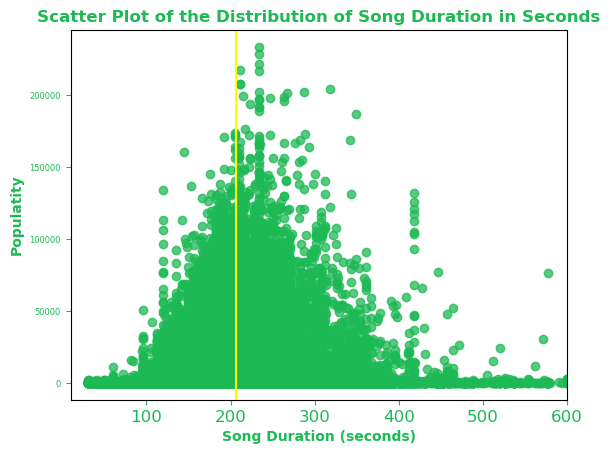

In [30]:
plt.scatter(spotify_song_length["duration_ms"], spotify_song_length["Popularity"], marker="o", facecolors="#1DB954", edgecolors="#1DB954",
            alpha=0.75)
plt.xlim(10,600)
plt.title('Scatter Plot of the Distribution of Song Duration in Seconds', weight='bold', color="#1DB954")
plt.xlabel('Song Duration (seconds)', weight='bold', color="#1DB954")
plt.axvline(x=207, color = 'yellow', label = 'Mean')
plt.ylabel("Populatity", weight='bold', color="#1DB954")
plt.tick_params(axis='x', colors="#1DB954", labelsize=12)
plt.tick_params(axis='y', colors="#1DB954", labelsize=6)
plt.savefig('temp.png', transparent=True, dpi=500)


In [26]:
stats.normaltest(spotify_song_length["duration_ms"])

NormaltestResult(statistic=187075.2163651941, pvalue=0.0)